# ALFD Mining and Visualizations

https://fire.ak.blm.gov/content/maps/aicc/Data/Data%20(zipped%20filegeodatabases)/AlaskaFireHistoryPerimeters_withOrigin_Info_1940_2022.zip

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fire_db = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/AlaskaLargeFireDatabase_FireHistory/AlaskaFireHistoryPerimeters_withOrigin_Info.gdb'
tundra_shapefile = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Geometries/Alaskan_Tundra/Alaska_tundra_merged.shp'

In [3]:
fire_gdf = gpd.read_file(fire_db)
tundra_shape = gpd.read_file(tundra_shapefile)

In [4]:
fire_gdf.head(3)

,FireYear,LocalIncidentIdentifier,IncidentName,CauseClassification,GISAcres,FireOccurID,UniqueFireIdentifier,POOLandownerCategory,POOOwnerUnit,POOResponsibleUnit,...,FireMergedDate,MergedWithFire,IsPrescribedFire,POOCoordLong,POOCoordLat,GACC,AICC_FIREID,Shape_Length,Shape_Area,geometry
0,2022,220004,2022 MID Fall Pile Rx,Human,86.99,{E3DEE530-A114-4D18-B65E-BC22CA83C665},2022-AKMID-220004,DOD,AKFWQ-Fort Wainwright,AKMID,...,NaT,None,Y,-147.639200,64.811540,AICC,69485,12131.955863,352038.050911,"MULTIPOLYGON (((328870.034 1661277.506, 328888..."
1,2022,000663,Tetthajik,Natural,122.85,{79D644B7-BDD2-4BDA-A78B-C3A680136EA2},2022-AKUYD-000663,BLM,AKEID-Eastern Interior Field Office,AKUYD,...,NaT,None,N,-141.283195,66.715833,AICC,69479,5431.052307,497153.298371,"MULTIPOLYGON (((559929.942 1916270.128, 559963..."
2,2022,000662,Tee Lake,Human,106.19,{5A724DE1-CE3C-4675-B563-413B6E3B9A58},2022-AKTAS-000662,State,AKDNS-AK Dept. Natural Resources,AKTAS,...,NaT,None,N,-143.966667,63.737778,AICC,69473,3440.392970,429741.612900,"MULTIPOLYGON (((492448.202 1567671.774, 492449..."


# Plot Perimeter of Fires from ALFD

/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


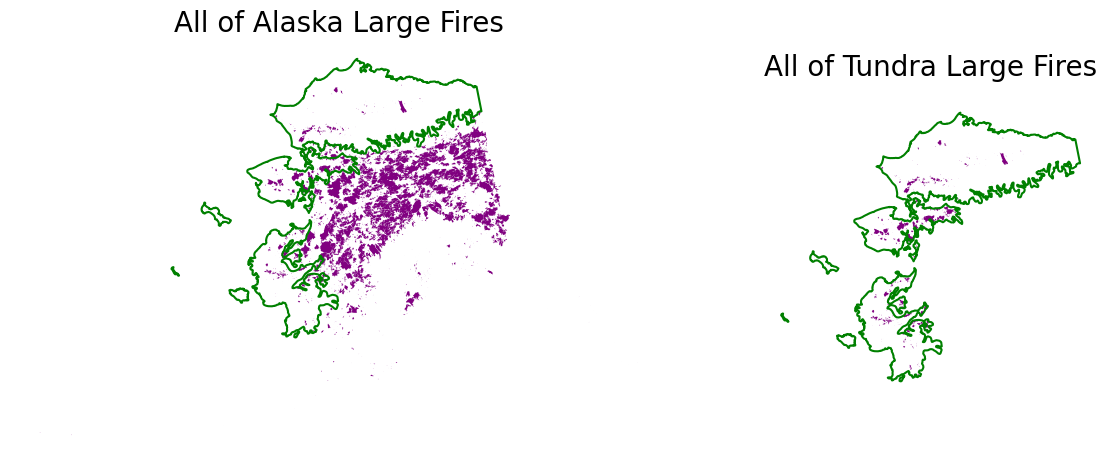

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1], 'height_ratios': [1]})

# plot all fires across alaska
tundra_shape.boundary.plot(ax=ax1, color="green")
fire_gdf.plot(ax=ax1, color="purple")

# plot only fires in the tundra
tundra_fires = fire_gdf.clip(tundra_shape)
tundra_fires.plot(ax=ax2, color="purple")
tundra_shape.boundary.plot(ax=ax2, color="green")

ax1.set_title("All of Alaska Large Fires", fontsize=20)
ax2.set_title("All of Tundra Large Fires", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

# Plot History of Fire in the Tundra

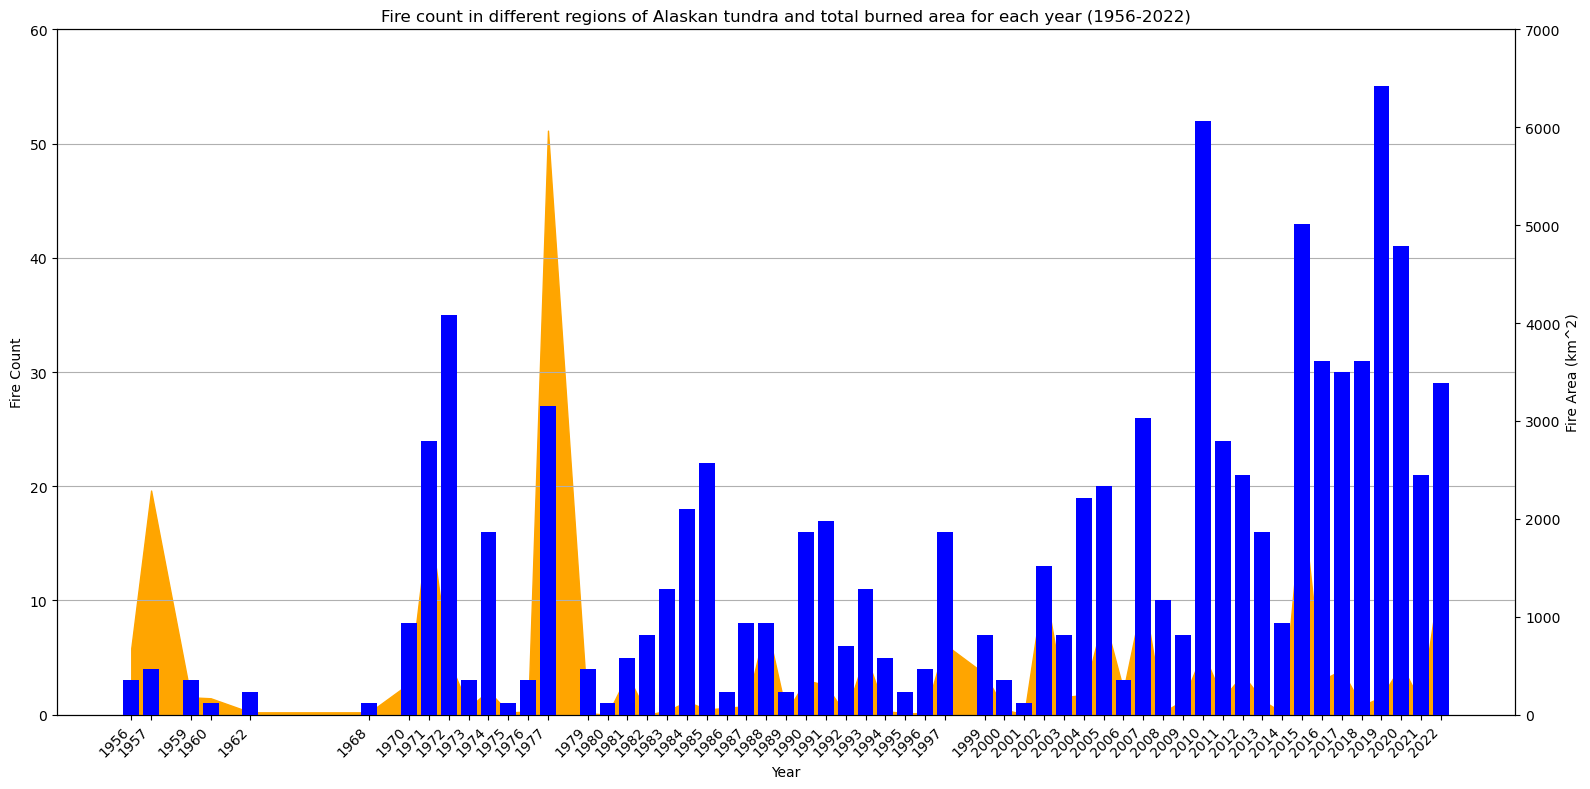

In [6]:
"""
Data Preparation
"""
tundra_fires = tundra_fires.sort_values(by=['FireYear'], ascending=True)
total_tundra_fires = tundra_fires.FireYear.value_counts()[tundra_fires.FireYear.unique()]
area = tundra_fires.groupby(["FireYear"])["Shape_Area"].sum() / 1000000

x = total_tundra_fires.to_dict().keys()
y = total_tundra_fires.to_dict().values()

xa = area.to_dict().keys()
ya = area.to_dict().values()


"""
Visualization instructions
"""
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.fill_between(xa, ya, label='zorder=1', zorder=1, color='orange')  # bottom
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(x, y, zorder=10, color='blue')

ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_ylim(0, 7000)
ax2.set_ylim(0, 60)
plt.xticks(list(x), rotation=45)
fig.autofmt_xdate(rotation=45)



ax2.set_ylabel('Fire Count')
ax2.yaxis.set_label_position("left")

ax1.set_ylabel('Fire Area (km^2)')
ax1.yaxis.set_label_position("right")

plt.title('Fire count in different regions of Alaskan tundra and total burned area for each year (1956-2022)')
plt.grid(axis='both')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plot Last 20 Years of Fire in the Tundra

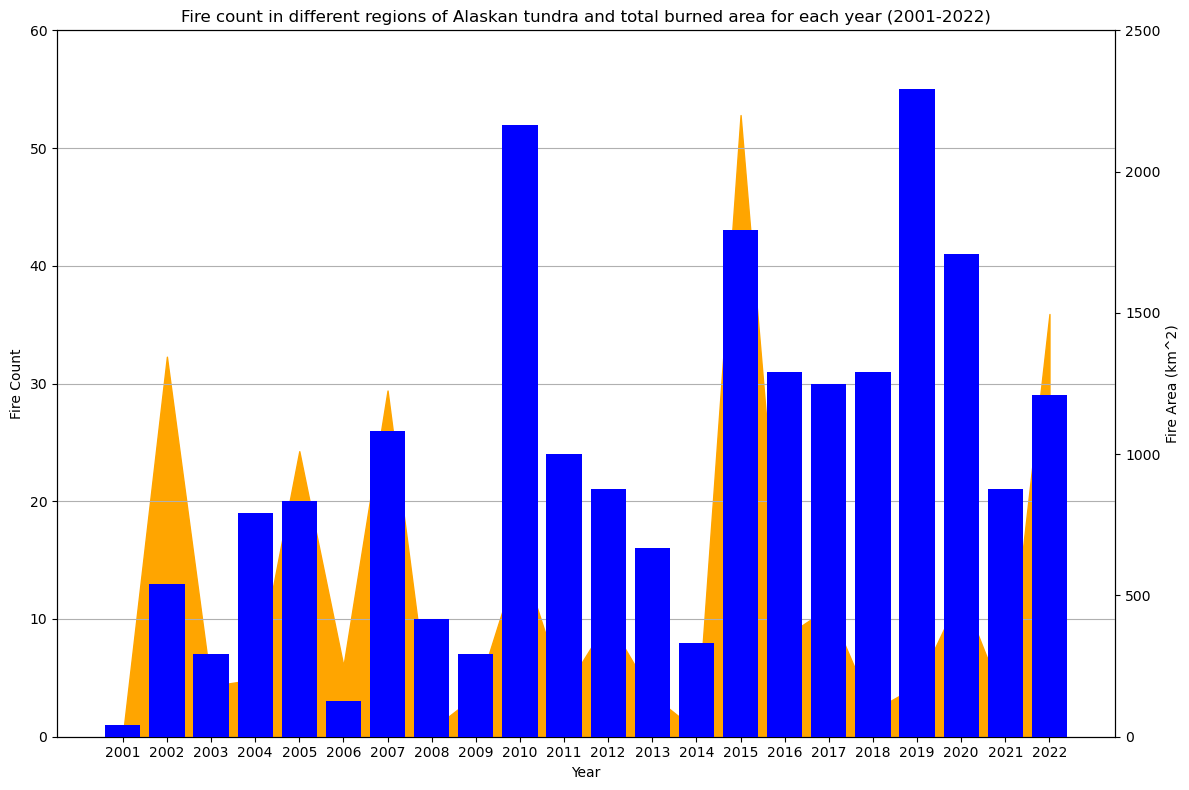

In [7]:
"""
Data Preparation
"""
tundra_fires_last20 = tundra_fires[tundra_fires.FireYear > 2000].sort_values(by=['FireYear'],ascending=True)
total_tundra_fires_last20 = tundra_fires_last20.FireYear.value_counts()[tundra_fires_last20.FireYear.unique()]
area = tundra_fires_last20.groupby(["FireYear"])["Shape_Area"].sum() / 1000000

x = total_tundra_fires_last20.to_dict().keys()
y = total_tundra_fires_last20.to_dict().values()

xa = area.to_dict().keys()
ya = area.to_dict().values()


"""
Visualization instructions
"""
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.fill_between(xa, ya, label='zorder=1', zorder=1, color='orange')  # bottom
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(x, y, zorder=10, color='blue')

ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_ylim(0, 2500)
ax2.set_ylim(0, 60)
plt.xticks(list(x))

ax2.set_ylabel('Fire Count')
ax2.yaxis.set_label_position("left")

ax1.set_ylabel('Fire Area (km^2)')
ax1.yaxis.set_label_position("right")

plt.title('Fire count in different regions of Alaskan tundra and total burned area for each year (2001-2022)')
plt.grid(axis='both')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# TODO:
# - fire animation with fires per year, one by one based on time?
# - fire animation with burned area intensity??
# - fire animation with severity or another metric? heatmap?
# - heatmap of where more fires have landed through that year??